# Intelligent Systems | HS2025 | SW05 
## Example of simple linear regression with python, SW05 lecture
### Eugen Rodel, 15/10/2025

# Forecasting Students Grade



# 1. Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set Seaborn style for plots
sns.set_style('whitegrid')


# 2. Load Data

In [15]:
# Load the uploaded data from the CSV file
data = pd.read_csv('study_hours_grades_50.csv')

# Display the first few rows of the DataFrame to understand the structure
data.head()


,Study Hours,Grade (%)
0,0.00,52.5
1,0.20,50.3
2,0.41,55.3
3,0.61,60.7
4,0.82,52.9


# 3. Visualize Data

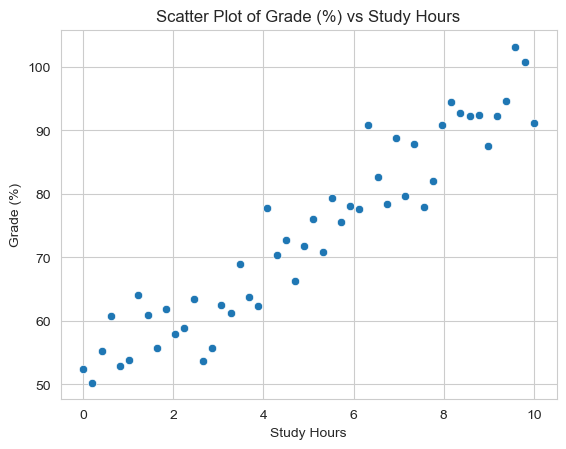

In [16]:
# Scatter plot to visualize the relationship between Gas Pumps and Sales per Year
sns.scatterplot(x='Study Hours', y='Grade (%)', data=data)
plt.xlabel('Study Hours')
plt.ylabel('Grade (%)')
plt.title('Scatter Plot of Grade (%) vs Study Hours')
plt.show()

# 4. Prepare Data

In [17]:
# Separate the features/independent variables (Study Hours) and the target/dependent variable (Grade (%))
X = data[['Study Hours']].values
y = data['Grade (%)'].values

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 5. Train The Model

In [19]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit (or learn) the model to the training data
model.fit(X_train, y_train)

LinearRegression()

# 6. Display Slope and Intercept

In [20]:
# Display the slope (coefficient) and intercept of the trained model
print(f'Coefficient (Slope): {model.coef_[0]:.2f}')
print(f'Intercept: {model.intercept_:.2f}')

Coefficient (Slope): 4.67
Intercept: 50.27


# 7. Make Predictions

In [21]:
# Predict the target variable for the test set
y_pred = model.predict(X_test)

# 8. Evaluate The Model

In [22]:
print(f'Test Data (How many study hours):\n{X_test}\n')
print(f'Predictions from trained model (Predicted grade (%)):\n {y_pred}')

Test Data (How many study hours):
[[5.71]
 [2.24]
 [2.04]
 [8.37]
 [0.41]
 [5.51]
 [7.76]
 [6.33]
 [4.49]
 [0.82]]

Predictions from trained model (Predicted grade (%)):
 [76.96039036 60.73945819 59.80453415 89.39488015 52.18490319 76.02546632
 86.54336182 79.8586549  71.25735369 54.10149748]


# 9. Calculate Mean Squared Error and R-squared

In [23]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 18.64
R-squared: 0.91


# 10. Visualize the Linear Regression Line

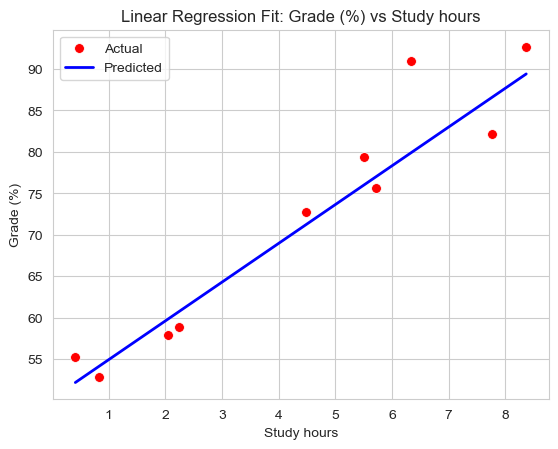

In [24]:

# Create a scatter plot for the actual data points
sns.scatterplot(x=X_test.flatten(), y=y_test, color='red', label='Actual', s=50)

# Create a line plot for the regression line (predicted values)
sns.lineplot(x=X_test.flatten(), y=y_pred, color='blue', linewidth=2, label='Predicted')

# Label the plot
plt.xlabel('Study hours')
plt.ylabel('Grade (%)')
plt.title('Linear Regression Fit: Grade (%) vs Study hours')
plt.legend()
plt.show()

In [25]:
# New grade with 2.5 hours of study
new_study = np.array([[2.5]])

# Use the trained model to predict sales for the new gas station
predicted_grade = model.predict(new_study)

# Output the prediction
print(f'Predicted Grade for a 2.5 hours of study: {predicted_grade[0]:.2f} (in %)')

Predicted Grade for a 2.5 hours of study: 61.95 (in %)
